# **Marvel Starcast: Celebrity Recognition Using CNN**

*In this project a model is build to recognize celebrity faces* **The Marvel Starcast** *using* **CNN (Convolutional Neural Networks).**

For this Project 4 celebrities considered for building the model
1. Chris Evans: Captain America
2. Chris Hemsworth: Thor
3. Paul Rudd: Ant-Man
4. Robert Downey Jr.: Iron-Man



**Table Of Content**

*   Importing Necessary Liberaries
*   Reading The Data And Image Augmentation
*   Building The CNN Model
*   Plotting Model Layers
*   Fitting The Model 
*   Evaluating Model
*   Predictions
*   Conclusion

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import joblib
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout,  Flatten, Dense,MaxPool2D
from skimage.segmentation import mark_boundaries
print('Libraries Imported')

Libraries Imported


**Mounting Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


**Reading data and Augmentation**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/MyDrive/MyDrive/DLNLP/celeb_dataset/Train_data',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

test_set = test_datagen.flow_from_directory('/content/MyDrive/MyDrive/DLNLP/celeb_dataset/Test_data',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 8636 images belonging to 4 classes.
Found 1726 images belonging to 4 classes.


**Building CNN Model**

In [ ]:
image_size = (224,224,3)

model = Sequential()
model.add(Conv2D(64,(3,3),activation = "relu", input_shape = image_size))
model.add(MaxPool2D())

model.add(Conv2D( 128, (3,3), activation = "relu"))
model.add(MaxPool2D())
# model.add(Dropout(0.2))

model.add(Conv2D( 256,(3,3), activation = "relu"))
model.add(MaxPool2D())
# model.add(Dropout(0.2))

model.add(Conv2D( 512,(3,3), activation = "relu"))
model.add(MaxPool2D())
# model.add(Dropout(0.2))



model.add(Flatten())
model.add(Dense(512, activation = "relu"))
# model.add(Dropout(0.15))

model.add(Dense(4, activation = "softmax"))


model.compile(loss = "kullback_leibler_divergence", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

**Plotting model layers**

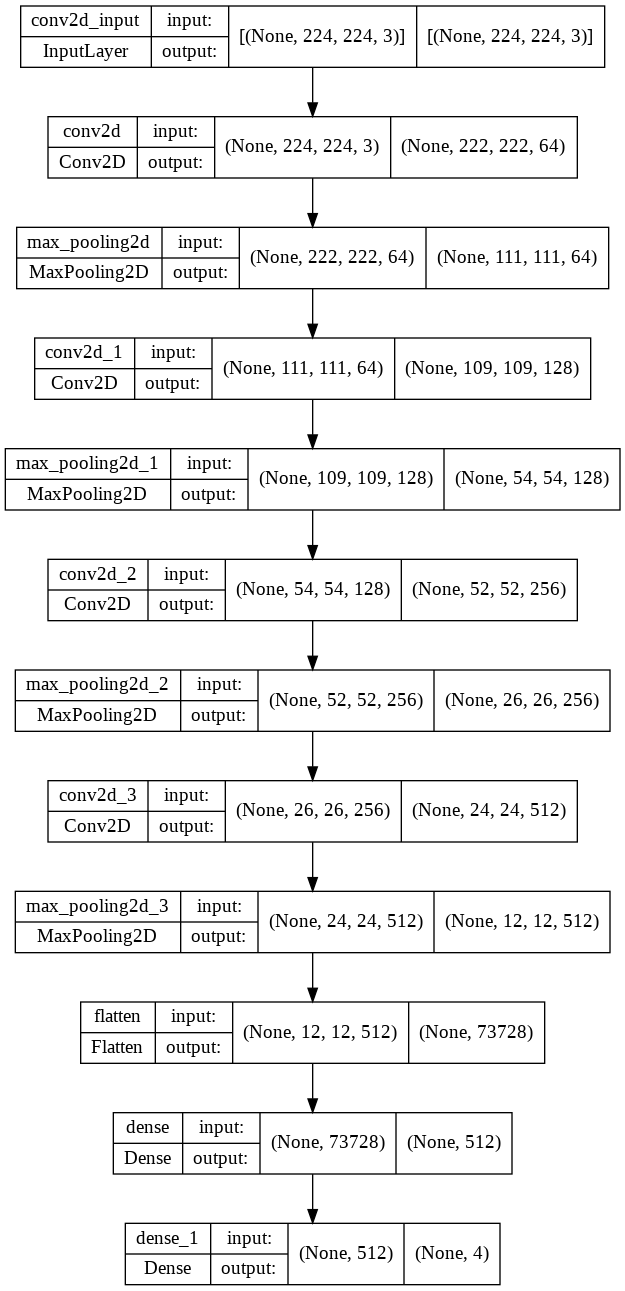

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

**Fitting the Model**

In [ ]:
history = model.fit(x = training_set, validation_data = test_set, steps_per_epoch=15, epochs= 30)

Epoch 1/30
15/15 [==============================] - 409s 28s/step - loss: 1.6897 - accuracy: 0.2500 - val_loss: 1.3857 - val_accuracy: 0.2723
Epoch 2/30
15/15 [==============================] - 286s 20s/step - loss: 1.3879 - accuracy: 0.2417 - val_loss: 1.3883 - val_accuracy: 0.2410
Epoch 3/30
15/15 [==============================] - 283s 20s/step - loss: 1.3829 - accuracy: 0.2833 - val_loss: 1.3831 - val_accuracy: 0.2410
Epoch 4/30
15/15 [==============================] - 285s 20s/step - loss: 1.3810 - accuracy: 0.2792 - val_loss: 1.3731 - val_accuracy: 0.2630
Epoch 5/30
15/15 [==============================] - 272s 19s/step - loss: 1.3765 - accuracy: 0.2583 - val_loss: 1.4012 - val_accuracy: 0.2642
Epoch 6/30
15/15 [==============================] - 273s 19s/step - loss: 1.4098 - accuracy: 0.3125 - val_loss: 1.3726 - val_accuracy: 0.2503
Epoch 7/30
15/15 [==============================] - 271s 19s/step - loss: 1.3832 - accuracy: 0.2625 - val_loss: 1.3830 - val_accuracy: 0.2955
Epoch 

Printing Accuracy

In [ ]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.625
validation_accuracy 0.7126303315162659


**Evaluating Model**

Loss And Accuracy Visualization

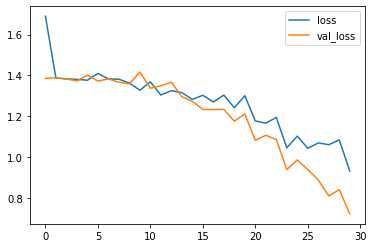

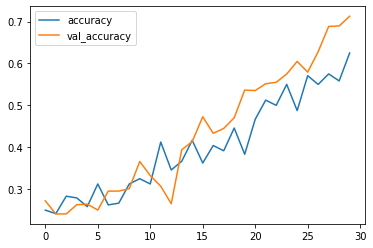

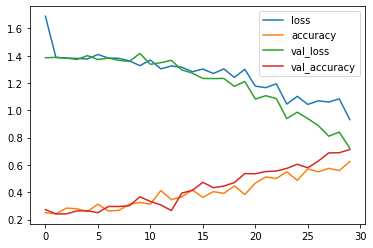

In [ ]:
losses = pd.DataFrame(history.history)
losses.head()
losses[['loss','val_loss']].plot() 
losses[['accuracy','val_accuracy']].plot() 
losses.plot()

Confusion Matrix and Classification Report

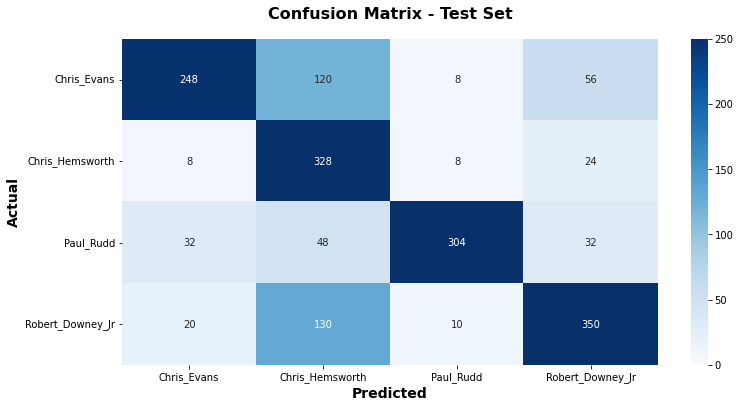

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

classes = ["Chris_Evans", "Chris_Hemsworth", "Paul_Rudd", "Robert_Downey_Jr"]

y_pred = model.predict(test_set)
predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

y_true=test_set.classes

CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

In [ ]:
print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       0.81      0.57      0.67       432
           1       0.52      0.89      0.66       368
           2       0.92      0.73      0.82       416
           3       0.76      0.69      0.72       510

    accuracy                           0.71      1726
   macro avg       0.75      0.72      0.72      1726
weighted avg       0.76      0.71      0.72      1726



**Predictions**

In [ ]:
class_dict = {0:"Chris_Evans",
              1:"Chris_Hemsworth",
              2:"Paul_Rudd",
              3:"Robert_Downey_Jr"}

prediction:  Paul_Rudd


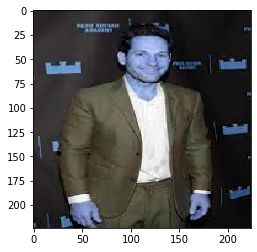

In [ ]:
test_image = cv2.imread('/content/MyDrive/MyDrive/DLNLP/celeb_dataset/single_prediction/Prediction1.jpg')
test_image = cv2.resize(test_image, (224, 224) ,interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)
pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

prediction:  Robert_Downey_Jr


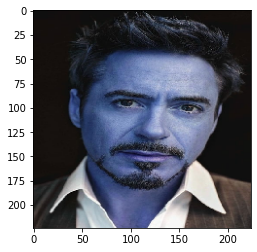

In [ ]:
test_image = cv2.imread('/content/MyDrive/MyDrive/DLNLP/celeb_dataset/single_prediction/Prediction2.jpg')
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)
pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

prediction:  Chris_Evans


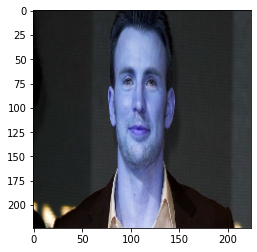

In [ ]:
test_image = cv2.imread('/content/MyDrive/MyDrive/DLNLP/celeb_dataset/single_prediction/Prediction3.jpg')
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)
pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

prediction:  Chris_Hemsworth


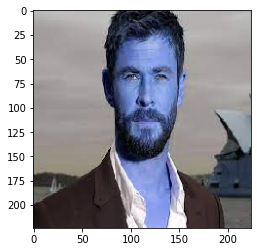

In [ ]:
test_image = cv2.imread('/content/MyDrive/MyDrive/DLNLP/celeb_dataset/single_prediction/Prediction4.jpg')
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)
pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

**Conclusion**


> On observing the predictions, it is clear that model is recognizing celebrity face correctly.






---
---
**This Notebook Ends Here**
